# EDA
---

In [1]:
import numpy as np
import pandas as pd
import neutron_stars as ns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tqdm import tqdm 
from glob import iglob

In [2]:
plt.rc('font', size=25); plt.rc('axes', titlesize=25); plt.rc('axes', labelsize=25); plt.rc('xtick', labelsize=22); plt.rc('ytick', labelsize=22)

In [3]:
from IPython.core.pylabtools import figsize
figsize(30, 10)

In [4]:
all_files = [
    f for f in iglob(ns.DATA_DIR + '*.npz')
    if "2Param" in f
]

### Load Data

In [5]:
details = np.zeros((0, 5))
spectra = np.zeros((0, 250))
coefficients = np.zeros((0, 2))

for file in tqdm(all_files):
    np_file = np.load(file)
    
    spectra = np.concatenate([
        spectra,
        np_file['spectra'][:, :250], 
    ])
    details = np.concatenate([
        details,
        np_file['details'], 
    ])
    coefficients = np.concatenate([
        coefficients,
        np_file['coefficients'], 
    ])

100%|██████████| 193/193 [02:15<00:00,  1.42it/s]


### Spectra

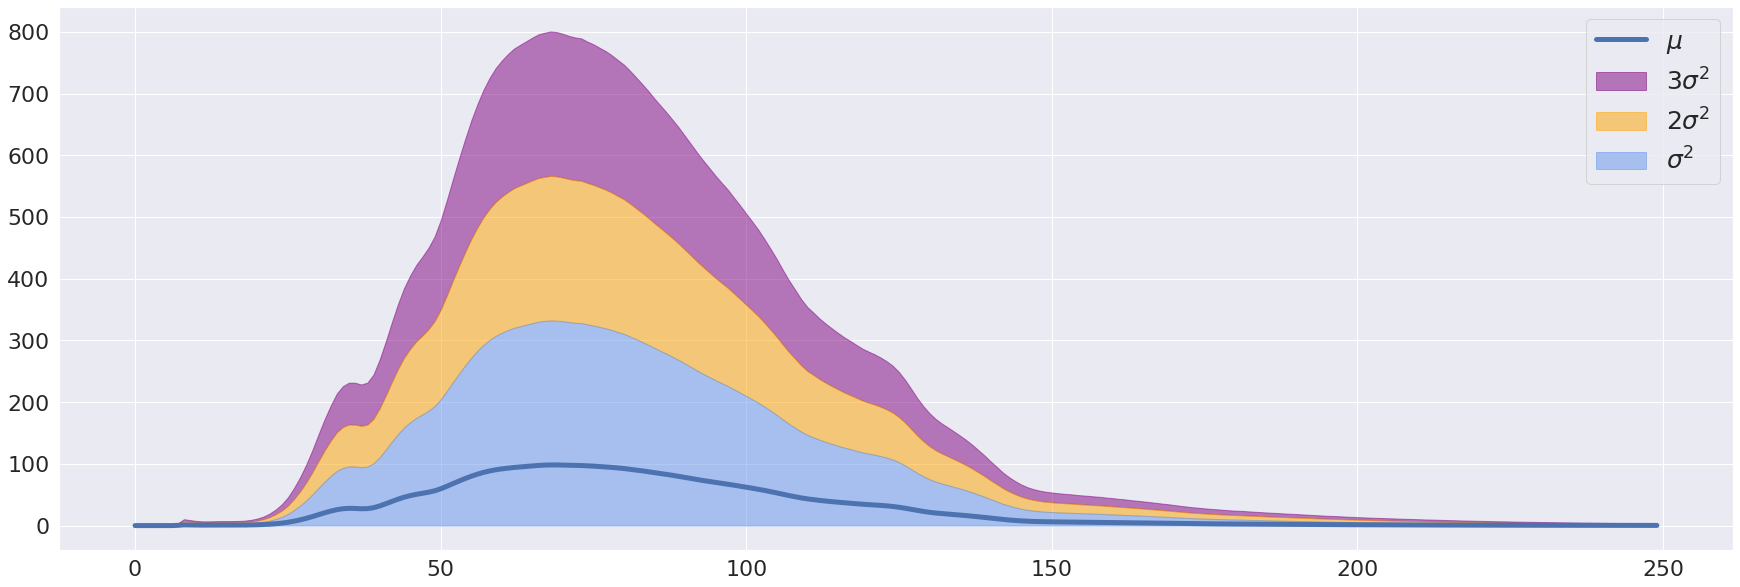

In [6]:
x = np.arange(250)
sigma = np.mean(spectra, 0) + np.std(spectra, 0)
sigma2 = np.mean(spectra, 0) + 2*np.std(spectra, 0)
sigma3 = np.mean(spectra, 0) + 3*np.std(spectra, 0)
lower = np.zeros(250)

plt.fill_between(x, sigma3, sigma2, alpha=.5, color='purple', label='$3\sigma^2$')
plt.fill_between(x, sigma2, sigma, alpha=.5, color='orange', label='$2\sigma^2$')
plt.fill_between(x, sigma, lower, alpha=.5, color='cornflowerblue', label=r'$\sigma^2$')
plt.plot(x, np.mean(spectra, 0), color='b', lw=5, label=r'$\mu$')

plt.legend(fontsize=25);

### Nuissance Parameters and Mass-Radius

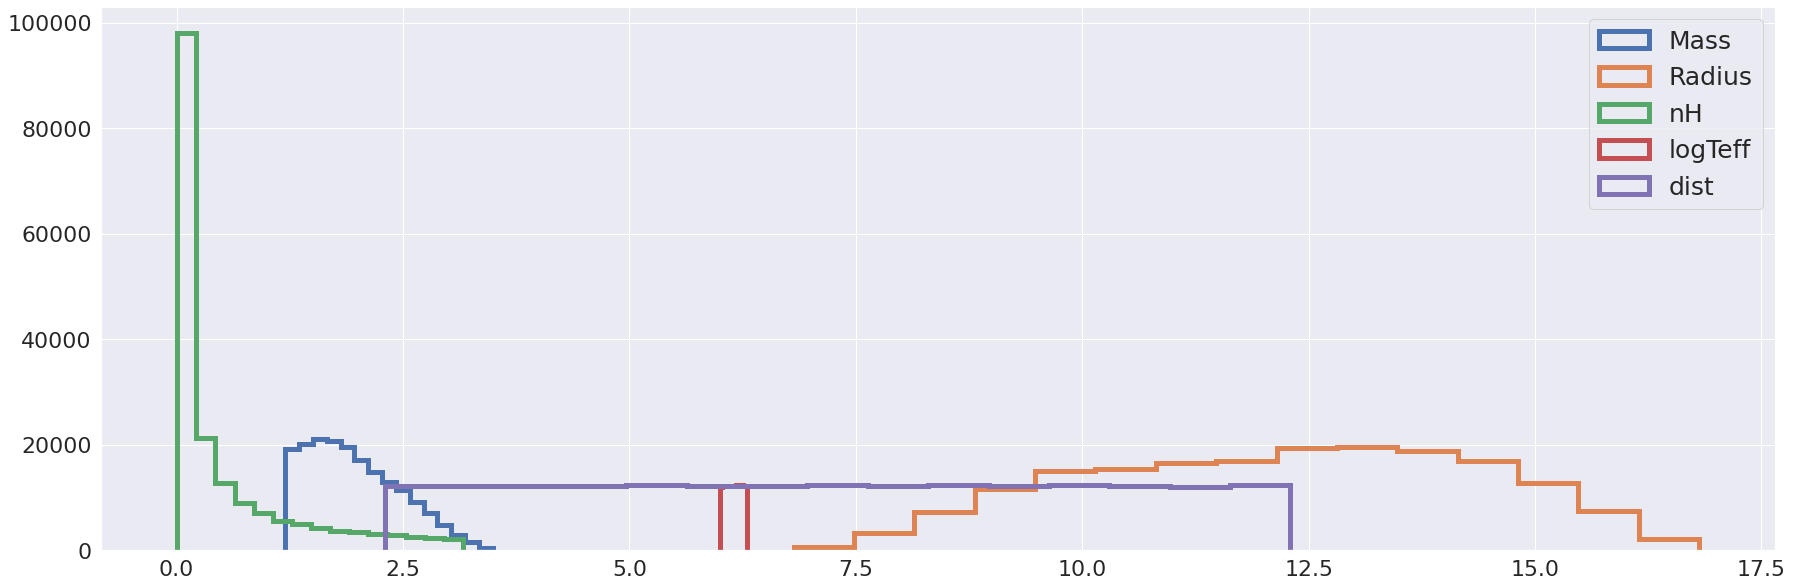

In [90]:
star = ['Mass', 'Radius', 'nH', 'logTeff', 'dist']
for i in range(5):
    plt.hist(details[:, i], bins=15, histtype='step', lw=5, label=star[i])
plt.legend(fontsize=25);

In [32]:
# for uc in np.unique(coefficients, axis=0):
#     duc = details[np.all(coefficients == uc, axis=1)]
#     shapes = []
#     for i in range(5):
#         shapes.append(np.unique(duc[:,i]).shape)
#     print(duc.shape[0], shapes)

### Coefficients

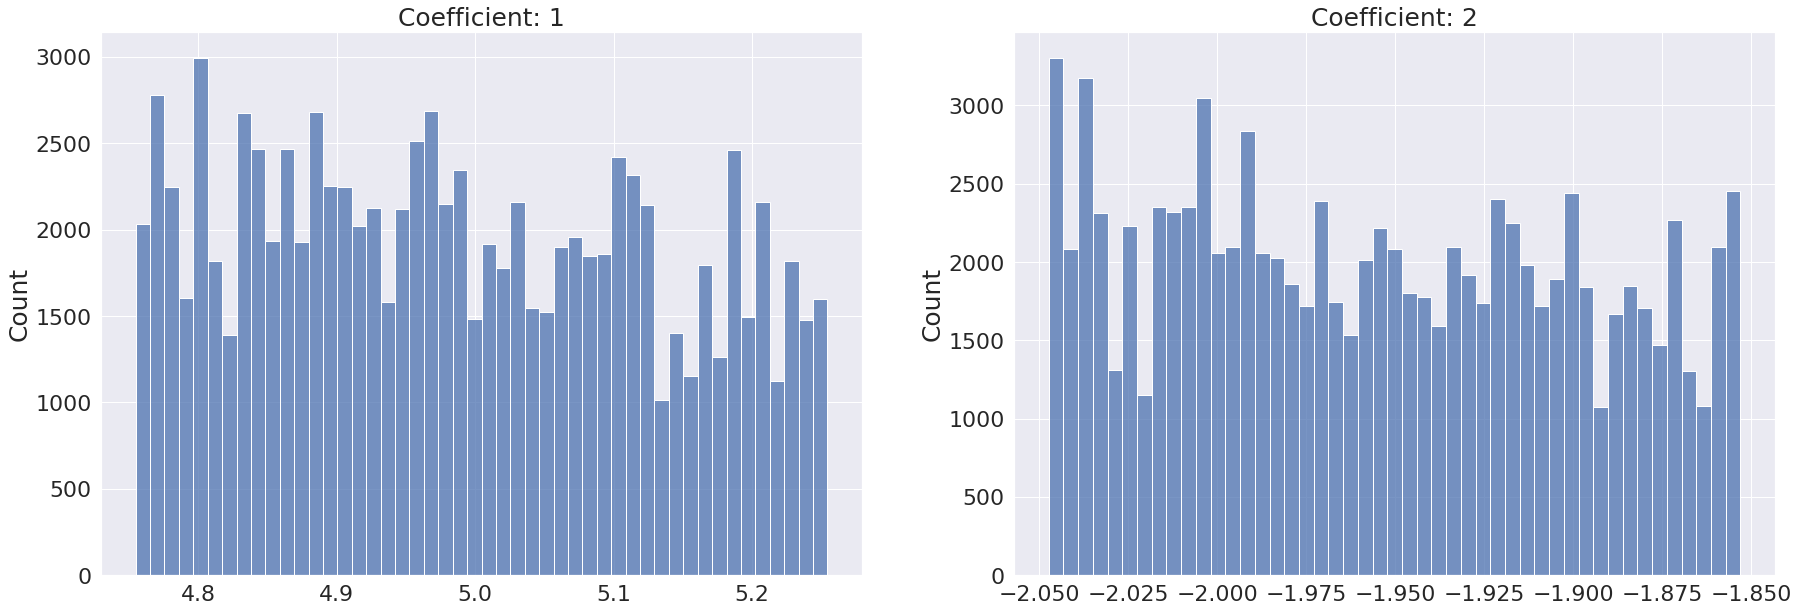

In [8]:
coef_df = pd.DataFrame(data=coefficients, columns=['C1', 'C2'])
for i in range(2):
    plt.subplot(1,2,i+1)
    ax = sns.histplot(data=coef_df[[f'C{i+1}']]); ax.get_legend().remove()
    plt.title(f'Coefficient: {i+1}', fontsize=25);
    
plt.savefig('../Figures/EDA/coefficients_hist.png')

### Mass-Radius Curves

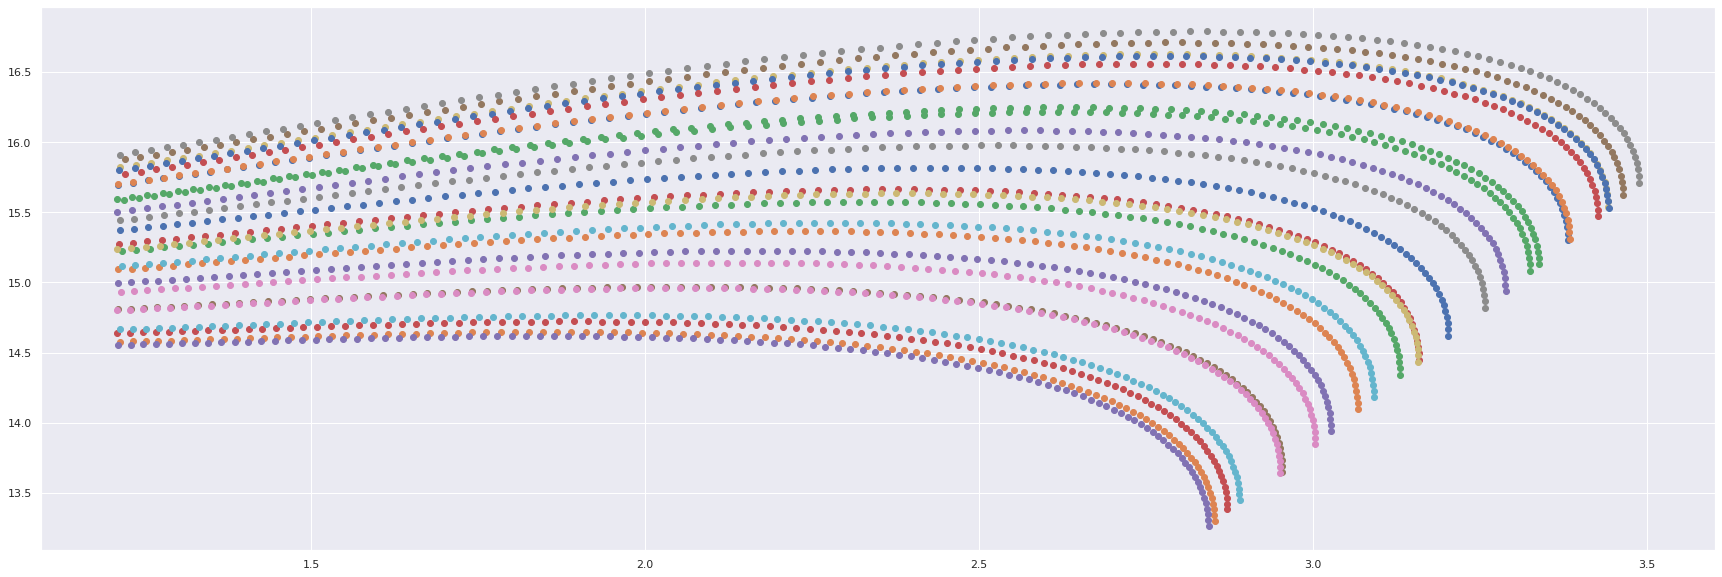

In [8]:
unique_coefficients = np.unique(coefficients, axis=0)
for i in range(25):
    idx = np.all(coefficients == unique_coefficients[i], axis=1)
    plt.scatter(details[idx, 0], details[idx, 1])

### Poisson Noise on Spectra

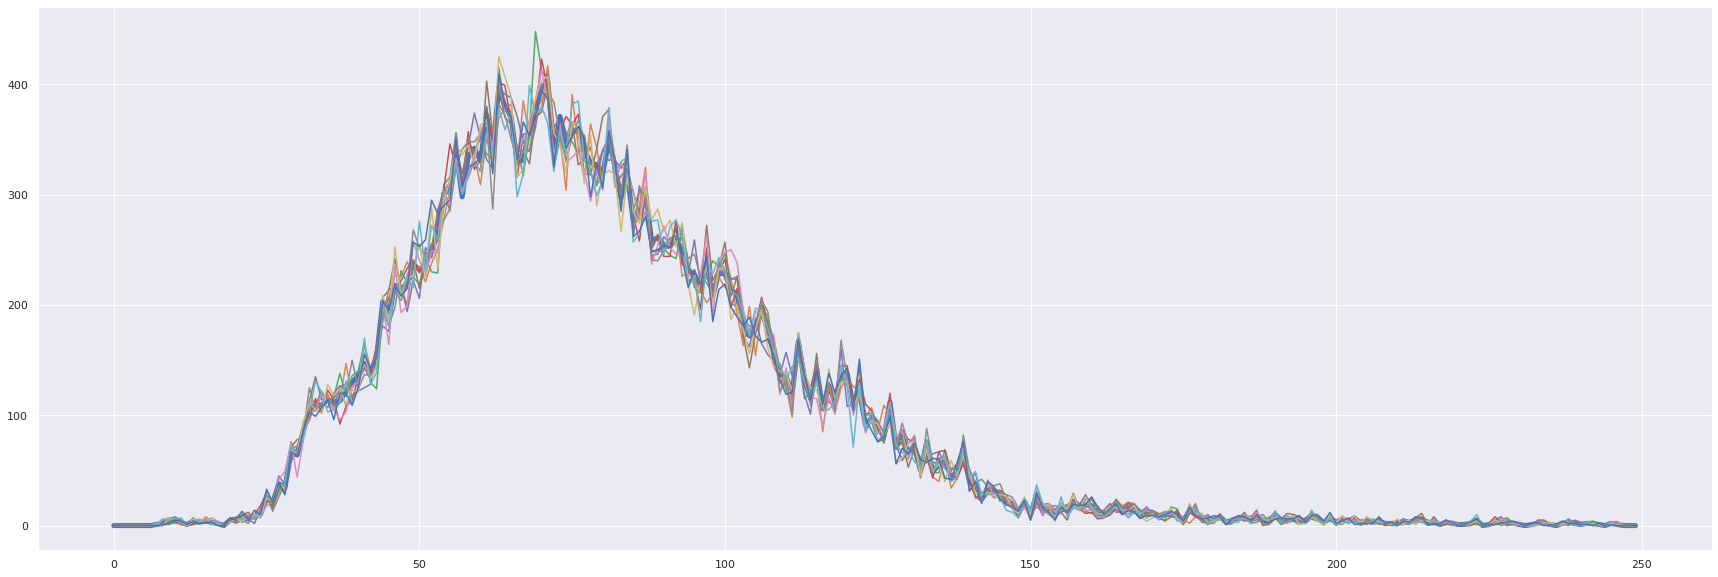

In [9]:
plt.plot(spectra[0], lw=5)
plt.plot(np.random.poisson(spectra[0], size=(10, 250)).T);

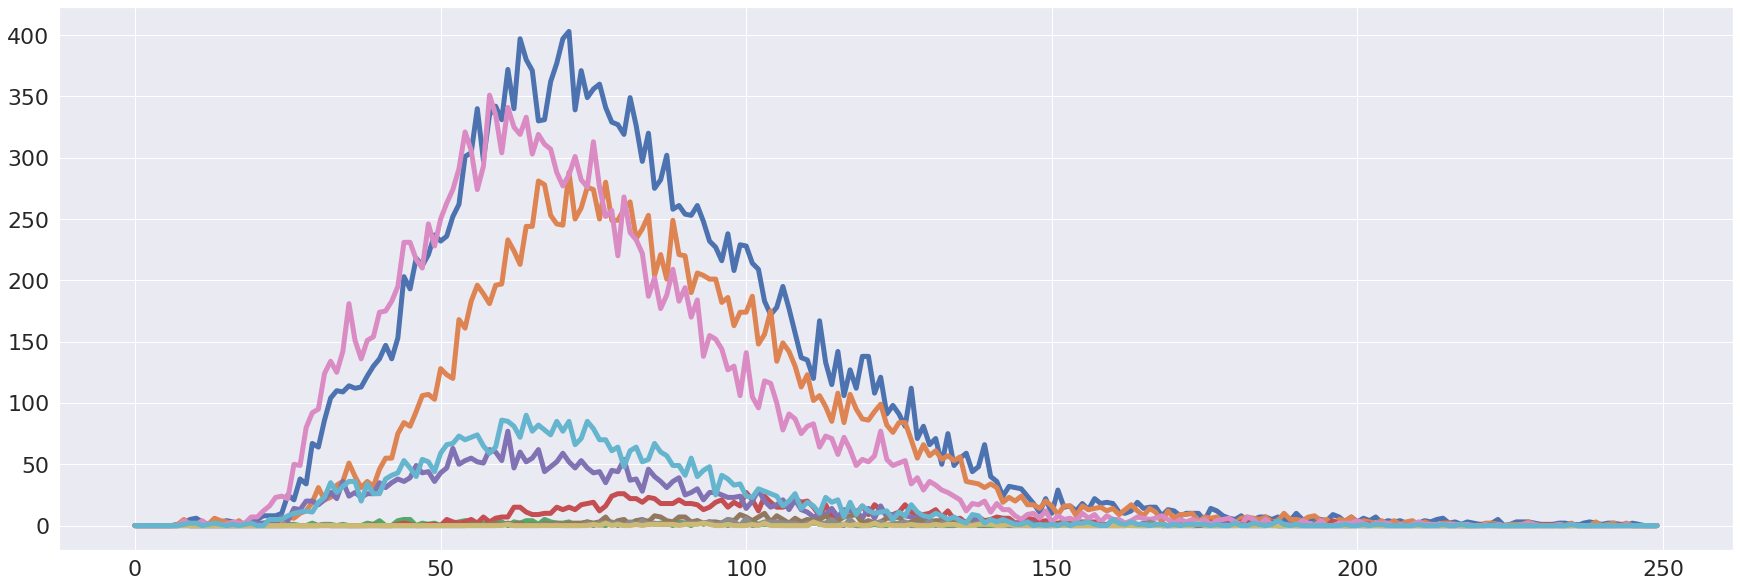

In [31]:
for i in range(0,100000, 10000):
    plt.plot(spectra[i], lw=5)

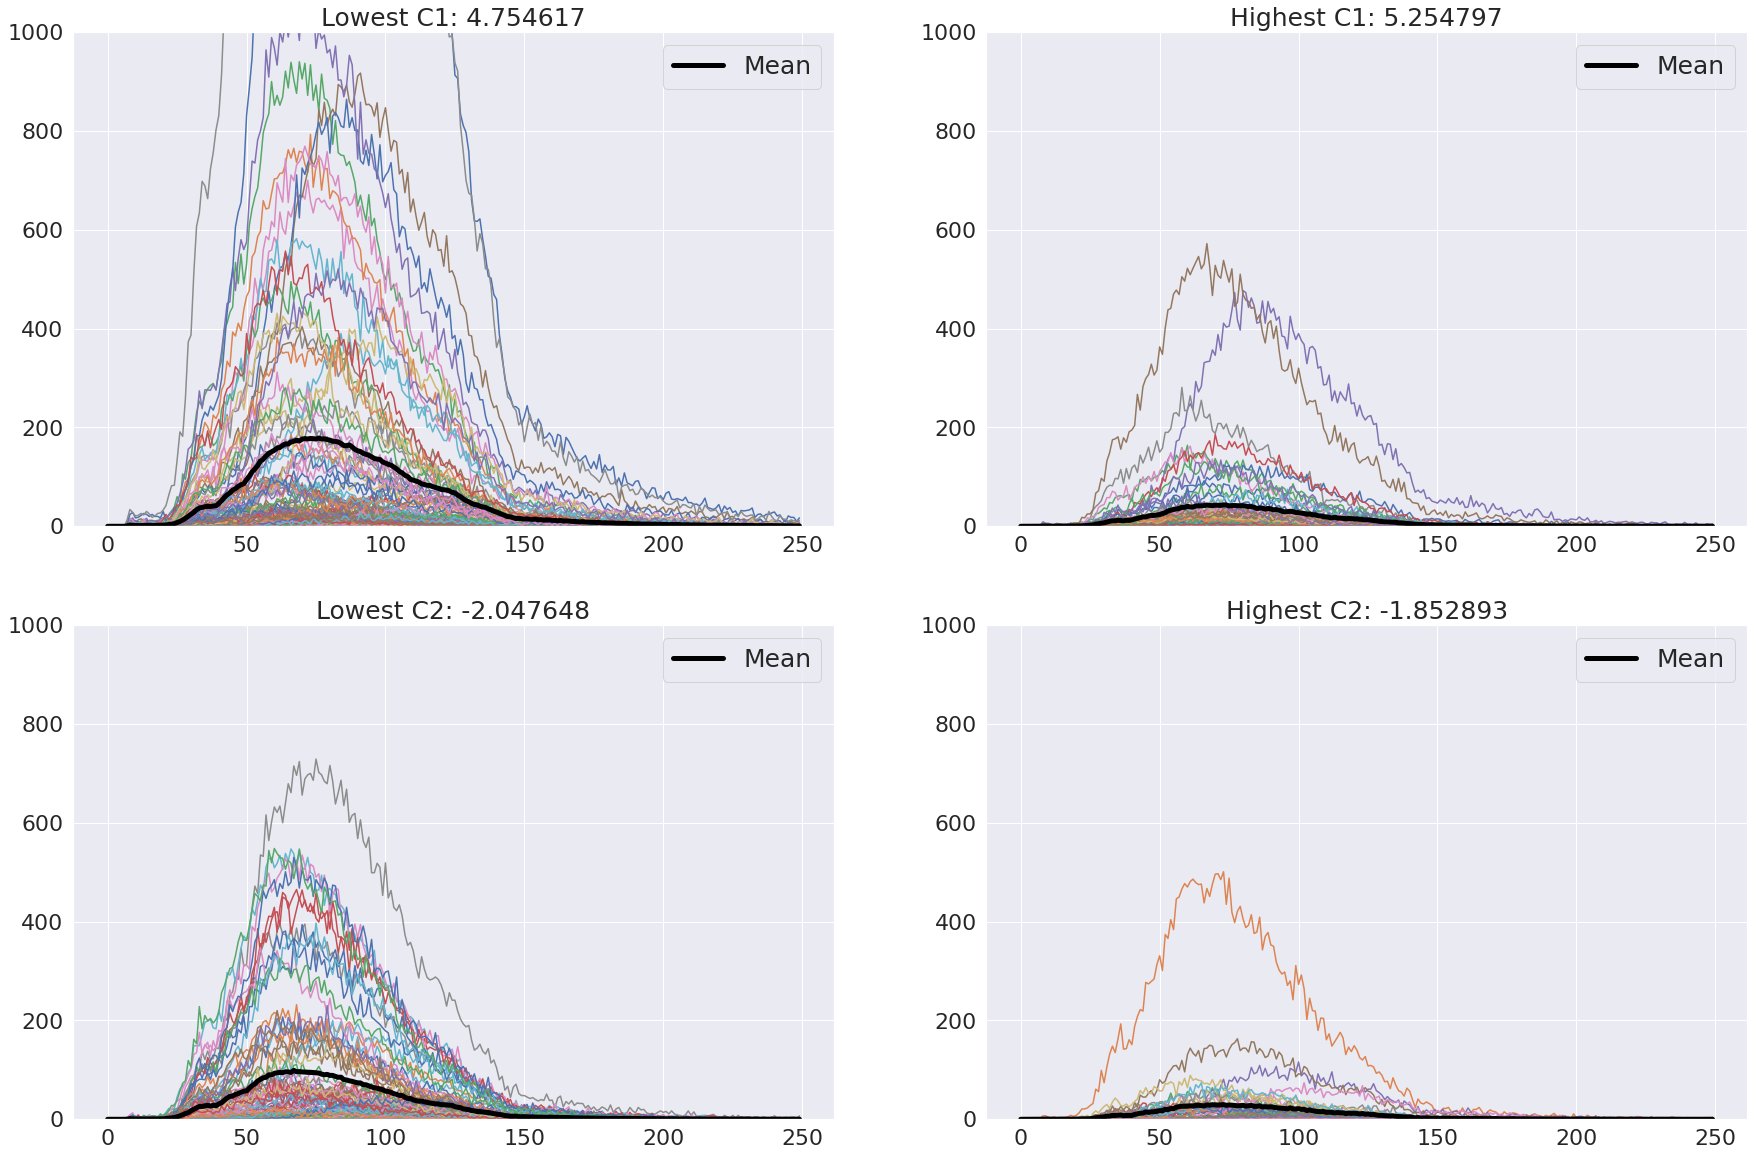

In [87]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
uc = np.unique(coefficients, axis=0)[0]
s = spectra[np.all(coefficients == uc, axis=-1)]
plt.title('Lowest C1: %f' % uc[0])
plt.plot(s.T); plt.plot(np.mean(s, 0), lw=5, color='black', label='Mean'); plt.ylim(0, 1000);
plt.legend(fontsize=25);


plt.subplot(2,2,2)
uc = np.unique(coefficients, axis=0)[1928]
s = spectra[np.all(coefficients == uc, axis=-1)]
plt.title('Highest C1: %f' % uc[0])
plt.plot(s.T); plt.plot(np.mean(s, 0), lw=5, color='black', label='Mean'); plt.ylim(0, 1000);
plt.legend(fontsize=25);


plt.subplot(2,2,3)
uc = np.unique(coefficients, axis=0)[1524]
s = spectra[np.all(coefficients == uc, axis=-1)]
plt.title('Lowest C2: %f' % uc[1])
plt.plot(s.T); plt.plot(np.mean(s, 0), lw=5, color='black', label='Mean'); plt.ylim(0, 1000);
plt.legend(fontsize=25);


plt.subplot(2,2,4)
uc = np.unique(coefficients, axis=0)[1870]
s = spectra[np.all(coefficients == uc, axis=-1)]
plt.title('Highest C2: %f' % uc[1])
plt.plot(s.T); plt.plot(np.mean(s, 0), lw=5, color='black', label='Mean'); plt.ylim(0, 1000);
plt.legend(fontsize=25);

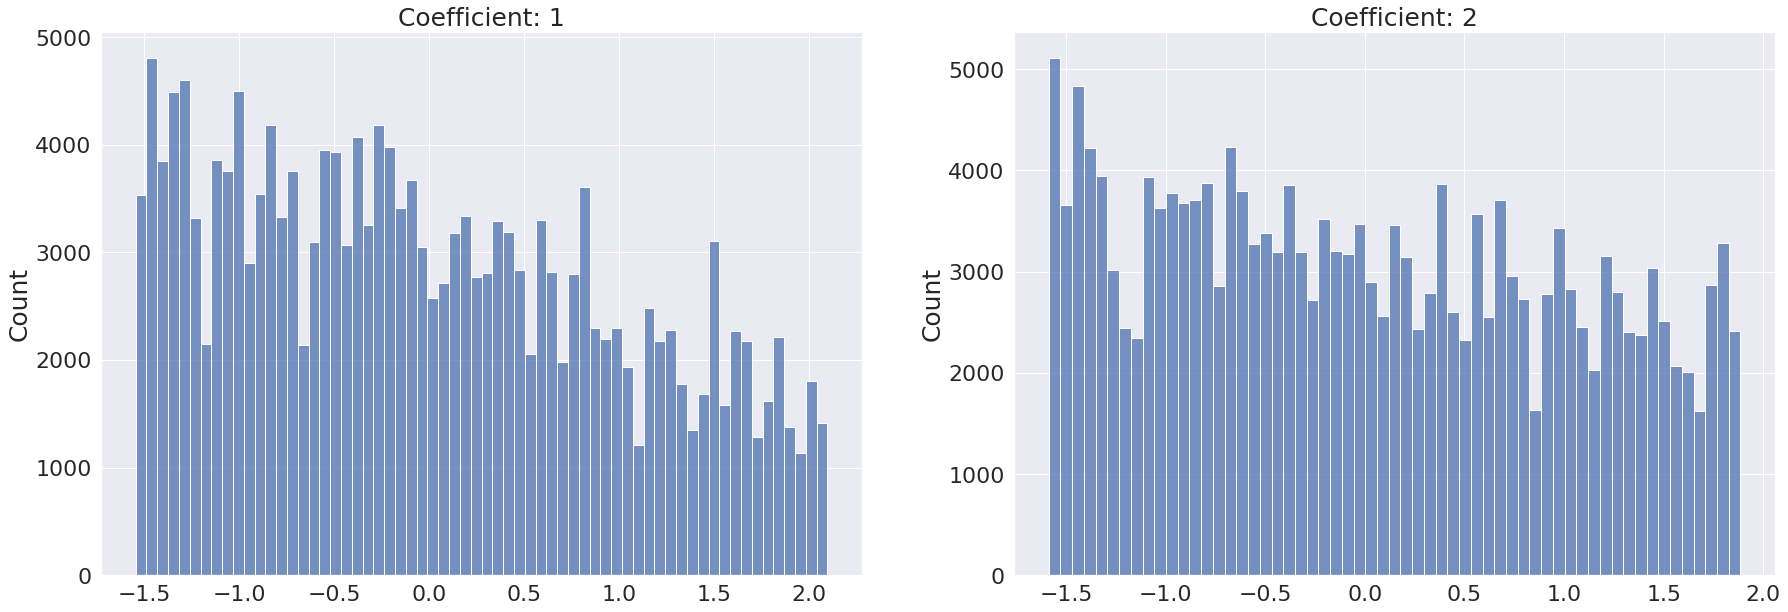

In [67]:
tmp_coefficients = np.copy(coefficients)
tmp_coefficients[:,0] = np.exp(coefficients[:,0])
tmp_coefficients[:,1] = np.exp(5+coefficients[:,1])
tmp_coefficients = (tmp_coefficients - tmp_coefficients.mean(0, keepdims=True)) / tmp_coefficients.std(0, keepdims=True)
coef_df = pd.DataFrame(data=tmp_coefficients, columns=['C1', 'C2'])
for i in range(2):
    plt.subplot(1,2,i+1)
    ax = sns.histplot(data=coef_df[[f'C{i+1}']]); ax.get_legend().remove()
    plt.title(f'Coefficient: {i+1}', fontsize=25);